<a href="https://colab.research.google.com/github/SaiGeethika-G/Machine-Learning-with-Python/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import dataset
from google.colab import files
uploaded = files.upload()
#df = pd.read_csv('/content/sample_data/california_housing_test.csv')

Saving data.csv to data.csv


In [8]:
#Data import
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [9]:
# Take the variables that will be used
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated']]
df = df.astype(int)

# New Section

In [10]:
# Replace yr_built into yr_renovated if the house was renovated
def year_built(df):
    if df['yr_built'] < df['yr_renovated']:
        return df['yr_renovated']
    else:
        return df['yr_built']
    
df['year_built'] = df.apply(year_built, axis = 1)

In [11]:
# Drop yr_built and yr_renovated
df.drop(columns = ['yr_built', 'yr_renovated'], inplace = True)

In [12]:
# Drop the data with price value = 0
df.drop(index = df[df['price'] == 0].index, inplace = True)

In [13]:
# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        4551 non-null   int64
 1   bedrooms     4551 non-null   int64
 2   bathrooms    4551 non-null   int64
 3   sqft_living  4551 non-null   int64
 4   sqft_lot     4551 non-null   int64
 5   year_built   4551 non-null   int64
dtypes: int64(6)
memory usage: 248.9 KB


In [14]:
# Shows the basic stat of the data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,year_built
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000
mean,5.579059e+05,3.394639,1.782905,2132.372226,1.483528e+04,1986.942650
std,5.639299e+05,0.904595,0.744431,955.949708,3.596408e+04,25.422954
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1900.000000
25%,3.262640e+05,3.000000,1.000000,1460.000000,5.000000e+03,1976.000000
50%,4.650000e+05,3.000000,2.000000,1970.000000,7.680000e+03,1996.000000
75%,6.575000e+05,4.000000,2.000000,2610.000000,1.097800e+04,2005.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,2014.000000


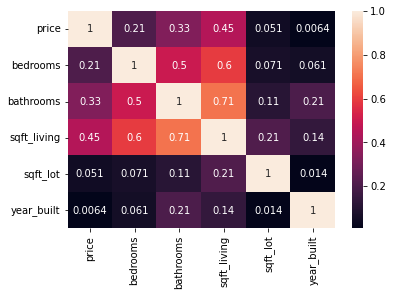

In [15]:
# Looking correlation bettween the variables
sns.heatmap(df.corr(), annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

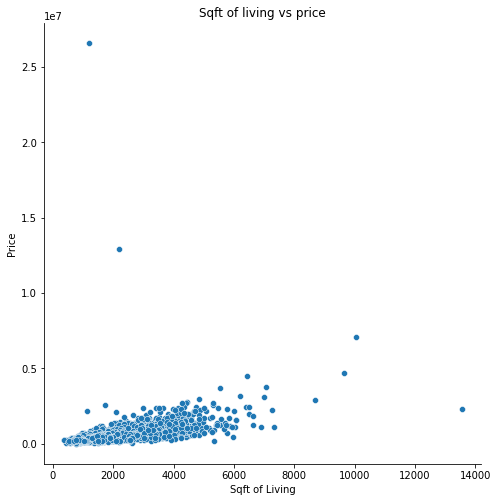

In [16]:
# Shows the plot sqft_living vs price
plt.figure(figsize = (12, 6))
sns.pairplot(df, x_vars = ['sqft_living'], y_vars = ['price'], size = 7, kind = 'scatter')
plt.xlabel('Sqft of Living')
plt.ylabel('Price')
plt.title('Sqft of living vs price')
plt.show()

In [17]:
# Remove the outliers data
df.drop(index = df[df['price'] > 10000000].index, inplace = True)
df.drop(index = df[df['sqft_living'] > 12000].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

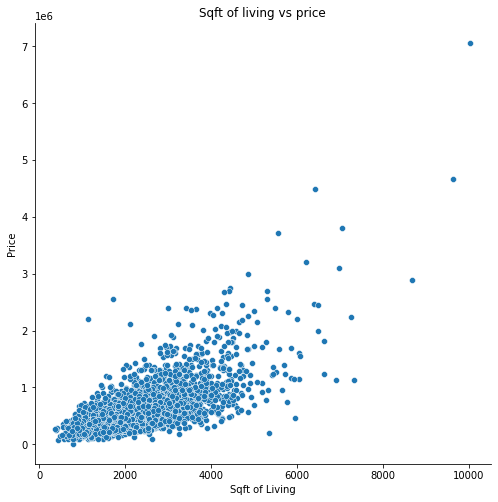

In [18]:
# sqft_living vs price without outliers data
plt.figure(figsize = (12, 6))
sns.pairplot(df, x_vars = ['sqft_living'], y_vars = ['price'], size = 7, kind = 'scatter')
plt.xlabel('Sqft of Living')
plt.ylabel('Price')
plt.title('Sqft of living vs price')
plt.show()

In [19]:
# Set X and y for before splitting into train test data
X = df.drop(columns = ['price'])
y = df['price']

# Import scikit learn
from sklearn.model_selection import train_test_split

# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100) 

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [21]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# Importing Linear Regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Fitting the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predicting the price for the test value
y_pred = lr.predict(X_test)

In [24]:
# Importing metrics for model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
# Calculate mMean squuare error
mse = mean_squared_error(y_test, y_pred)

In [26]:
# Calculate R square value
r2 = r2_score(y_test, y_pred)

In [27]:
print('Mean squared error : ', mse)
print('r square : ', r2)

Mean squared error :  77480562521.52122
r square :  0.5161381464930981


In [28]:
# Intercept and coeff of the line
print('Intercept of the model : ', lr.intercept_)
print('Coefficient of the line : ', lr.coef_)

Intercept of the model :  542554.3220232485
Coefficient of the line :  [-53955.59637531  17330.28524968 275266.29514029 -23068.62355252
 -37641.39639931]
